In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

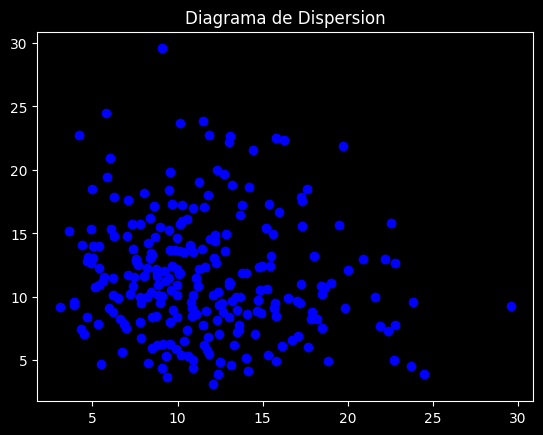

In [47]:
data = np.genfromtxt('sample23.dat')
plt.style.use('dark_background')
l1 = []
l2 = []

for i in range(0, len(data)-1):
    l1.append(data[i])
    l2.append(data[i+1])
    
l1 = np.array(l1)
l2 = np.array(l2)

plt.plot(l1, l2, 'o', color='blue')

plt.title('Diagrama de Dispersion')
plt.show()

In [48]:
def var(data,mean): #Calcula S^2
    size=len(data)
    sum=0
    for i in range(size):
        sum+= (mean-data[i])**2
    return (sum/(size-1))

def percentil(data,x):
    assert x==25 or x==50 or x==75, "Error: la funcion solo calcula los precentiles 25,50,75"
    datos=data.copy()
    datos=np.sort(datos)
    n=len(datos)

    if x!=50:
        if x==25:
            n=n//2 if len(datos)%2==0 else n//2 +1
            datos=datos[:125]   #percentil 25
        else:
            datos=datos[125:]   #percentil 75
    
    n=len(datos)
    p=(datos[n//2 -1]+datos[n//2])/2 if len(datos)%2==0 else datos[n//2]

    return p

In [49]:
size=len(data)
max_d=max(data)
min_d=min(data)
mean=sum(data)/size
variance=var(data,mean)
per_25=percentil(data,25)
median=percentil(data,50)
per_75=percentil(data,75)
skewness=3*(mean-median)/(variance**0.5)

In [50]:
print("El valor mínimo muestral es: {}".format(min_d))
print("El valor maximo muestral es: {}".format(max_d))
print("La media muestral es: {}".format(mean))
print("La varianza muestral es: {}".format(variance))
print("La desviacion estandar muestral es: {}".format(variance**0.5)) 
print("El valor de medida de la asimetría de la distribucion es:{}".format(skewness))
print("La mediana es {}".format(median))
print("El percentil 25 es {}".format(per_25))
print("El percentil 50 es {}".format(per_75))

El valor mínimo muestral es: 3.092925
El valor maximo muestral es: 29.567547
La media muestral es: 11.601359179999998
La varianza muestral es: 22.066673719958665
La desviacion estandar muestral es: 4.697517825400843
El valor de medida de la asimetría de la distribucion es:0.4426295156895047
La mediana es 10.9082725
El percentil 25 es 8.380492
El percentil 50 es 14.224659


In [51]:
prom = mean

# Parámetros para la distribución normal
mu = prom
sigma = variance**0.5
# Parámetros para la distribución chi cuadrado
freedom_d = prom
#Estos parametros han sido obtenidos usando el metodo de maxima verosimilitud

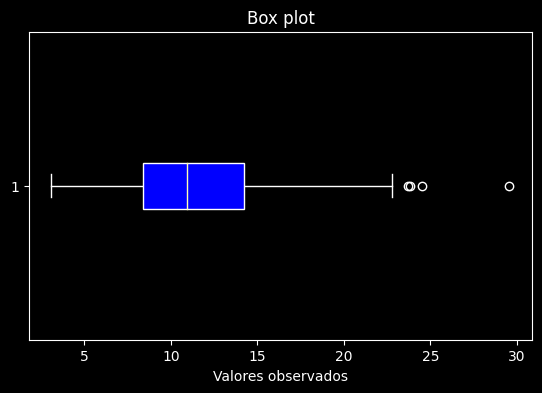

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 4))

# rectangular box plot
bplot1 = ax.boxplot(data,vert=False, patch_artist=True)
        
ax.set_title('Box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor('blue')

ax.set_xlabel('Valores observados')
plt.show()

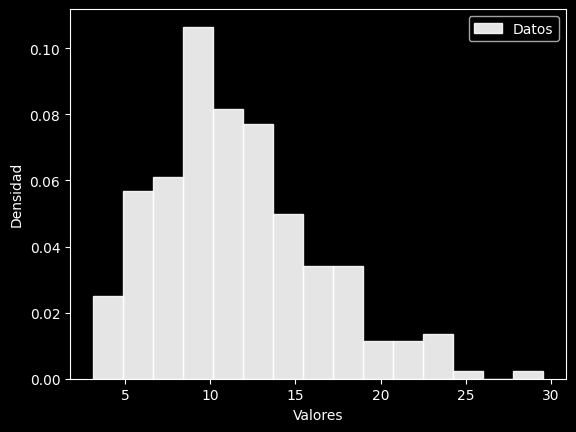

In [53]:
plt.hist(data, bins=15, edgecolor='white', color='white', density=True, label='Datos', alpha=0.9)
ax.set_title('Box plot')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()

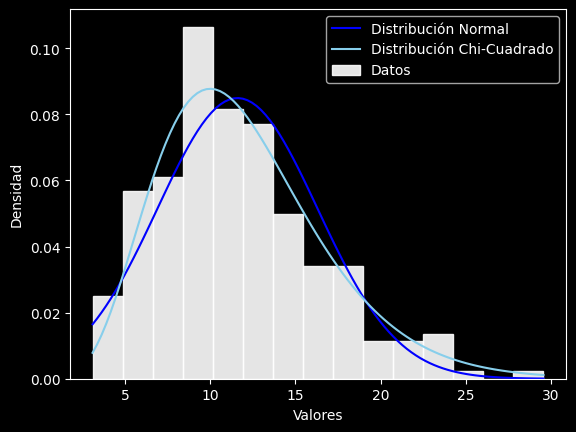

In [54]:
# Histograma de los datos
plt.hist(data, bins=15, edgecolor='white', color='white', density=True, label='Datos', alpha=0.9)

#Puntos para generar las pdf
x = np.linspace(np.min(data), np.max(data), 100)

# Función de densidad de la distribución normal
y_normal = norm.pdf(x, mu, sigma)
plt.plot(x, y_normal, color='blue', label='Distribución Normal')

# Función de densidad de la distribución chi-cuadrado
y_chi2 = chi2.pdf(x, round(freedom_d))
plt.plot(x, y_chi2, color='skyblue', label='Distribución Chi-Cuadrado')


plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()

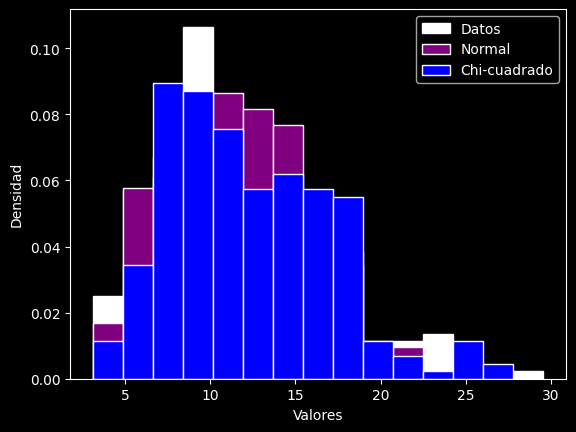

In [55]:
np.random.seed(1235)

random_data_normal = np.random.normal(mu, sigma, size=len(data))
random_data_chi2 = np.random.chisquare(round(freedom_d), size=len(data))

# Límites de los intervalos
bin_edges = np.linspace(np.min(data), np.max(data), 16)  # 15 bins, 16 edges

# Histograma de los datos
plt.hist(data, bins=bin_edges, edgecolor='white', color='white'
        , density=True, label='Datos', alpha=1)

plt.hist(random_data_normal, bins=bin_edges, edgecolor='white', color='purple'
        , density=True, label='Normal',alpha=1)

plt.hist(random_data_chi2, bins=bin_edges, edgecolor='white', color='blue'
        , density=True, label='Chi-cuadrado',alpha=1)

plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()

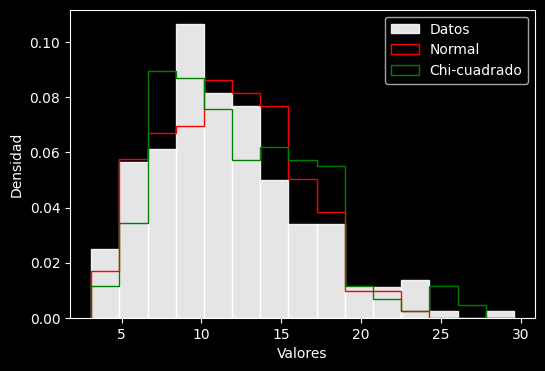

In [56]:
np.random.seed(1235)

plt.figure(figsize=(6,4))

random_data_normal = np.random.normal(mu, sigma, size=len(data))
random_data_chi2 = np.random.chisquare(round(freedom_d), size=len(data))

# Límites de los intervalos
bin_edges = np.linspace(np.min(data), np.max(data), 16)  # 15 bins, 16 edges

# Histograma de los datos
plt.hist(data, bins=bin_edges, edgecolor='white', color='white'
        , density=True, label='Datos', alpha=0.9)

plt.hist(random_data_normal, bins=bin_edges, color='red'
        , density=True, label='Normal',alpha=1,histtype = "step")

plt.hist(random_data_chi2, bins=bin_edges, color='green'
        , density=True, label='Chi-cuadrado',alpha=1,histtype = "step")

plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [57]:
data = np.sort(data)
data_cp = data
Datos = []
for i in range(len(data)):
    data_cp[i] = int(data[i])
    if not data_cp[i] in Datos:
        Datos.append(data_cp[i])

def Procesar_muestra(data):

    Frecuencias = [0 for _ in range(len(Datos) - 2)]

    for i in range(len(data)):
        if data[i] >= 23:
            Frecuencias[-1] += 1
        elif data[i] <= 3:
            Frecuencias[0] += 1
        else:
            Frecuencias[int(data[i]) - 3] += 1
    return Frecuencias

Frecuencias = Procesar_muestra(data)
#La lista frecuencias muestra la frecuencia de los elementos i + 3 en la posicion i de la lista
# los elementos mayores o iguales a 23 estan todos englobados en la ultima posicion de la lista. 
# los elementos menores o iguales a 3 estan todos englobados en la primer posicion de la lista.

In [58]:
Proba_chi2 = []
Proba_norm = []

Proba_chi2.append(chi2.cdf(3, round(freedom_d)))
for i in range(1, len(Frecuencias) - 1):
    Proba_chi2.append(chi2.cdf(Datos[i], round(freedom_d)) - chi2.cdf(Datos[i - 1], round(freedom_d)))
Proba_chi2.append(1 - sum(Proba_chi2))

Proba_norm.append(norm.cdf(3, mu, sigma))
for i in range(1, len(Frecuencias) - 1):
    Proba_norm.append(norm.cdf(Datos[i], mu, sigma) - norm.cdf(Datos[i - 1], mu, sigma))
Proba_norm.append(1 - sum(Proba_norm))

In [59]:
def estadisticoT(esperado, observado, n):
    T = 0
    for i in range(len(esperado)):
        T += ((observado[i] - n * esperado[i]) ** 2) / (n * esperado[i])
    return T

estadisticoChi2 = estadisticoT(Proba_chi2, Frecuencias, len(data))
estadisticoNorm = estadisticoT(Proba_norm, Frecuencias, len(data))

In [60]:
def generar_muestra_chi2(size):
    muestra = np.random.chisquare(round(freedom_d), size)
    Frec = Procesar_muestra(muestra)
    return Frec

def generar_muestra_norm(size):
    muestra = np.random.normal(mu, sigma, size)
    Frec = Procesar_muestra(muestra)
    return Frec

In [61]:
def p_valor_chi2_sim(Estadistico, esperado, ovservado, size, freedom_d, n_sim):
    suma = 0
    for i in range(n_sim):
        observado = generar_muestra_chi2(size)

        T_nuevo = estadisticoT(esperado, observado, size)
        if T_nuevo >= Estadistico:
            suma += 1
        
    return suma/n_sim
    
def p_valor_norm_sim(Estadistico, esperado, ovservado, size, mu, sigma, n_sim):
    suma = 0
    for i in range(n_sim):
        observado = generar_muestra_norm(size)

        T_nuevo = estadisticoT(esperado, observado, size)
        if T_nuevo >= Estadistico:
            suma += 1
        
    return suma/n_sim

print(p_valor_chi2_sim(estadisticoChi2, Proba_chi2, Frecuencias, len(data), round(freedom_d), 10000))
print(p_valor_norm_sim(estadisticoNorm, Proba_norm, Frecuencias, len(data), mu, sigma, 10000))  

0.2545
0.0343


In [62]:
data = np.sort(np.genfromtxt('sample23.dat'))

def EstadisticoChiKS(freedom_d, data):
    EstaChi = []

    for i in range(len(data)):
        EstaChi.append((i+1)/250 - chi2.cdf(data[i], round(freedom_d)))
        EstaChi.append(chi2.cdf(data[i], round(freedom_d)) - (i)/250)

    return(max(EstaChi))


def EstadisticoNorKS(mu, sigma, data):
    EstaNor = []

    for i in range(len(data)):
        EstaNor.append((i+1)/250 - norm.cdf(data[i], mu, sigma))
        EstaNor.append(norm.cdf(data[i], mu, sigma) - (i)/250)
        
    return(max(EstaNor))

EstChi = EstadisticoChiKS(round(freedom_d), data)
EstNorm = EstadisticoNorKS(mu, sigma, data)

In [63]:
def p_valor_chi2_sim(freedom_d, EstChi, n_sim):
    suma = 0
    for i in range(n_sim):
        Nuevos_datos = np.sort([np.random.chisquare(round(freedom_d)) for _ in range(250)])

        freedom_d_est = round(sum(Nuevos_datos) / len(Nuevos_datos))

        Esta_sim = EstadisticoChiKS(freedom_d_est, Nuevos_datos)
        if Esta_sim > EstChi:
            suma += 1
    return suma / n_sim

def p_valor_norm_sim(mu, sigma, EstNorm, n_sim):
    suma = 0
    for i in range(n_sim):
        Nuevos_datos = np.sort([np.random.normal(mu, sigma) for _ in range(250)])

        mu_est = sum(Nuevos_datos) / len(Nuevos_datos)
        sigma_est = var(Nuevos_datos, mu_est)**0.5
        
        Esta_sim = EstadisticoNorKS(mu_est, sigma_est, Nuevos_datos)
        if Esta_sim > EstNorm:
            suma += 1
    return suma / n_sim

print(p_valor_chi2_sim(round(freedom_d), EstChi, 100))
print(p_valor_norm_sim(mu, sigma, EstNorm, 100))

0.49
0.0
